# Proposta:

## Desenvolva um sistema fuzzy de Takagi-Sugeno de ordem zero ou primeira ordem para aproximar a função seno.

### Método de inferência:

+ Modelo de TSK (Takagi-Sugeno-Kang)
''' Similar ao método de Mamdani porém a propriedade sintática é ligeiramente diferente: os consequentes das regras, ao invés de serem formados por relações fuzzy, se compõem de equações paramétricas relacionando as entradas e as saídas do processo. Os consequentes são funcionais e não linguísticos. '''


## Passo 1: Definir as Variáveis de Entrada e Saída:

+ Um conjunto de dados representando uma reta?!

## Passo 2: Dividir o Universo de Discurso:

+ Dividiremos a variável de entrada x em três conjuntos fuzzy:

## Passo 3: Definir as Regras Fuzzy:

+ Criaremos regras do tipo "Se x é Pequeno, então seno_aproximado = a * x + b."
Cada regra terá parâmetros a e b a serem ajustados.

## Passo 4: Calcular os Graus de Pertinência:

+ Para cada regra, calcule os graus de pertinência dos conjuntos fuzzy das variáveis de entrada. Podemos usar a função fuzz.membership.membership_triangular do pacote scikit-fuzzy para calcular os graus de pertinência.

## Passo 5: Calcular os Parâmetros:

+ Usaremos técnicas de aprendizado de máquina para determinar os parâmetros a e b de cada regra. Isso ajustará as retas ou funções lineares para se adequarem aos dados.

## Passo 6: Fazer a Inferência:

+ Para uma entrada específica x, calcule as saídas de todas as regras usando as funções lineares com os parâmetros aprendidos.

## Passo 7: Agregação:

+ Combine as saídas de todas as regras usando os graus de pertinência de cada regra. Uma maneira comum de fazer isso é calcular uma média ponderada das saídas.

## Passo 8: Saída Final:

+ A saída final do modelo TSK é a agregação das saídas das regras.



# Gráficos Entrada

Gráficos Saida

50


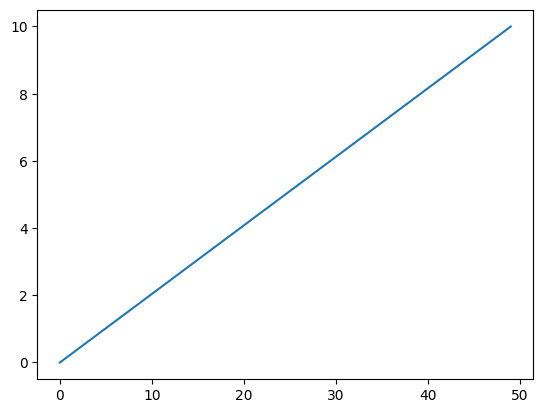

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#definir universo de entrada reta afim
x = np.linspace(0,10,50)
enter_universe_size = np.size(x)

# Tamanho do universo de discurso m = 100
m = len(x)
print(m)

plt.plot(x)

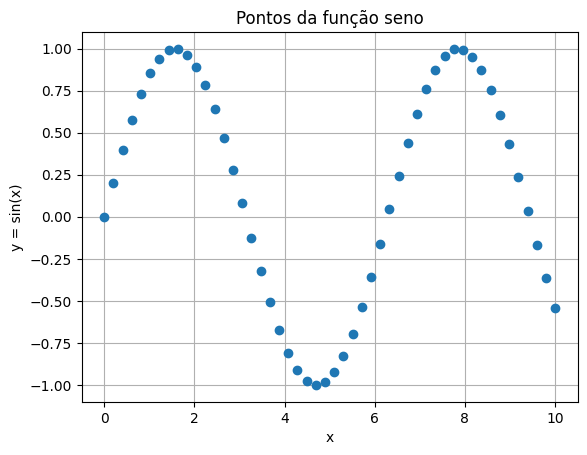

In [ ]:
# Calcular a saída desejada (y) que é o seno de x
d = np.sin(x)

# Plotar apenas os pontos (x, y)
plt.plot(x, d, 'o')
plt.xlabel('x')
plt.ylabel('y = sin(x)')
plt.title('Pontos da função seno')
plt.grid(True)
plt.show()


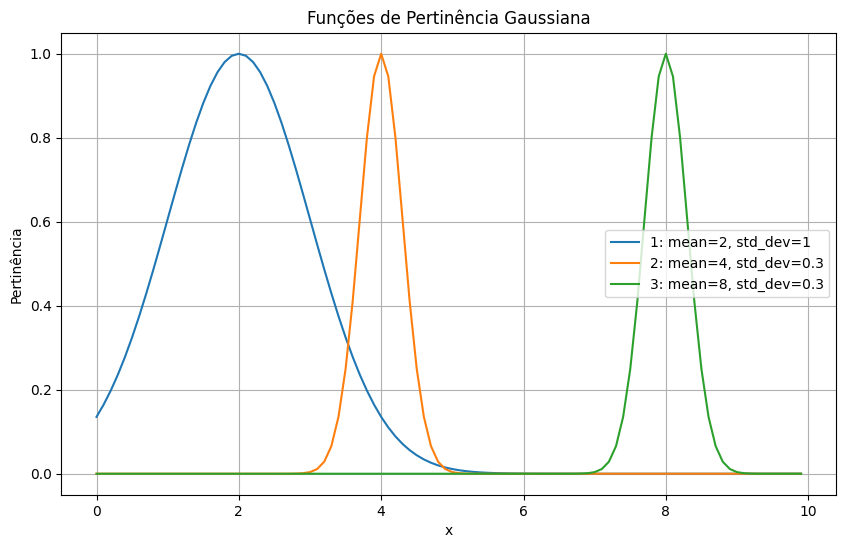

In [ ]:
#função de pertinencia gaussiana
def gauss(x, m, k):
    return np.exp(-k * (x - m) ** 2)

antecedents = {1: (2, 1), 2: (4, 0.3), 3: (8, 0.3)}

x = np.arange(0,10, 0.1)

size_antecedents = len(antecedents)

# Plotagem das funções de pertinência gaussiana
plt.figure(figsize=(10, 6))  # Ajuste o tamanho da figura conforme necessário

for label, (mean, std_dev) in antecedents.items():
    y = gauss(x, mean, 1 / (2 * std_dev ** 2))  # Calcula a gaussiana para o conjunto
    plt.plot(x, y, label=f'{label}: mean={mean}, std_dev={std_dev}')

plt.xlabel('x')
plt.ylabel('Pertinência')
plt.title('Funções de Pertinência Gaussiana')
plt.legend()
plt.grid(True)
plt.show()

[ 0.          0.20408163  0.40816327  0.6122449   0.81632653  1.02040816
  1.2244898   1.42857143  1.63265306  1.83673469  2.04081633  2.24489796
  2.44897959  2.65306122  2.85714286  3.06122449  3.26530612  3.46938776
  3.67346939  3.87755102  4.08163265  4.28571429  4.48979592  4.69387755
  4.89795918  5.10204082  5.30612245  5.51020408  5.71428571  5.91836735
  6.12244898  6.32653061  6.53061224  6.73469388  6.93877551  7.14285714
  7.34693878  7.55102041  7.75510204  7.95918367  8.16326531  8.36734694
  8.57142857  8.7755102   8.97959184  9.18367347  9.3877551   9.59183673
  9.79591837 10.        ]
50
(50, 3)
[ 0.58931207 -0.23032262  0.09629269]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]


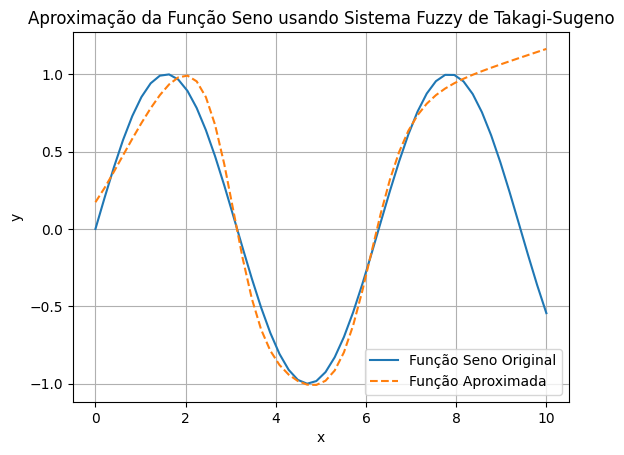

In [ ]:
# Define the consequent functions (linear equations)

b = [0.25 , 0, 0.2]  # Intercepts

# Create the universe of discourse
x = np.linspace(0, 10)
print(x)

# Calculate the weights for each rule
m = len(x)
print(m)
size_antecedents = len(antecedents)
w = np.zeros((m, size_antecedents))

for i, point in enumerate(x):
    for j, (mean, std_dev) in enumerate(antecedents.values()):
        w[i, j] = gauss(point, mean, std_dev)

# Calculate the values of matrix M
M = np.zeros((m, size_antecedents))

for i in range(size_antecedents):
    for point_idx, point in enumerate(x):
        M[point_idx, i] = point * (w[point_idx, i])

print(M.shape)

alpha, residuals, rank, singular_values = np.linalg.lstsq(M, d, rcond=None)


print(alpha)
# Calculate the output for each rule
y_aproximado = np.zeros(m)

print(y_aproximado)

for i in range(size_antecedents):
    y_aproximado += (w[:, i] * (alpha[i] * x + b[i]))

# Normalize the result
y_aproximado /= np.sum(w, axis=1)

# Plot the original sine function
plt.plot(x, np.sin(x), label='Função Seno Original', linestyle='solid')

# Plot the approximated output
plt.plot(x, y_aproximado, label='Função Aproximada', linestyle='dashed')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Aproximação da Função Seno usando Sistema Fuzzy de Takagi-Sugeno')
plt.legend()
plt.grid(True)
plt.show()
